# Análise Algoritmo Frame Diff

In [2]:
# carregamentos iniciais

import framediff
import matplotlib.pyplot as plt
import sys
import numpy as np
import util
import peakutils


def getdY(frame):
    return frame.dY


dY = np.vectorize(getdY)
videos = {
            'original' : './in/thecrimesofgrindelwaldTrim.mp4', 
            'blur' : './in/grindelwald_blur.avi',
#             'text' : './in/grindelwald_text.avi',
            'legenda' : './in/grindelwald2_text.avi',
            'outro' : './in/outro.mp4'
         }

## Plotar assinatura pura X filtrada

--------------True FrameDiff---------------
262/263 (99.6%)
--------------True FrameDiff---------------
263/264 (99.6%)
--------------True FrameDiff---------------
263/264 (99.6%)
--------------True FrameDiff---------------
241/242 (99.6%)


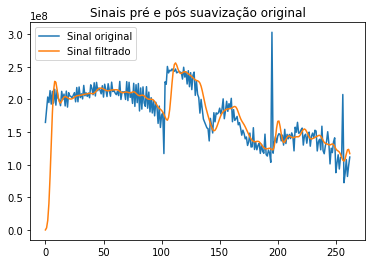

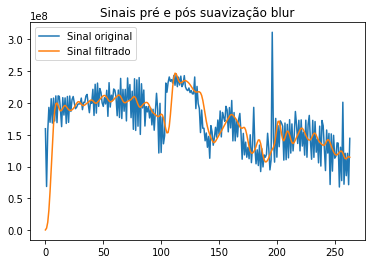

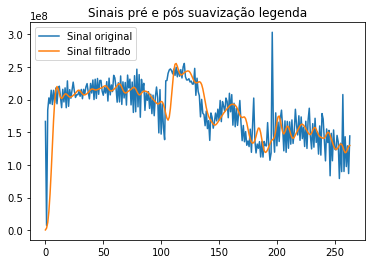

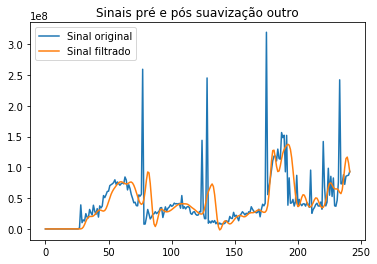

In [3]:
for i, v in videos.items():
    plt.figure(i)
    fingerprint = framediff.run(v)
    ass = dY(fingerprint)
    ass_lowpass = util.butter_lowpass_filter(ass, 3.5, 30.0)
    plt.title("Sinais pré e pós suavização {}".format(i))
    plt.plot(ass, label="Sinal original")
    plt.plot(ass_lowpass, label="Sinal filtrado")
    
#     picos = framediff.getvideoindex(fingerprint, 300, 5, 0.5)
#     plt.plot(picos[0], picos[1], 'ro')
    plt.legend()

plt.show()

## Original X Cópia + Distorção

--------------True FrameDiff---------------
262/263 (99.6%)
--------------True FrameDiff---------------
263/264 (99.6%)
--------------True FrameDiff---------------
263/264 (99.6%)
--------------True FrameDiff---------------
241/242 (99.6%)


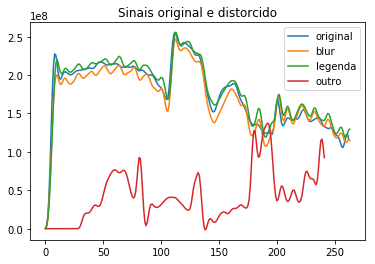

In [4]:
for i, v in videos.items():
    fingerprint = framediff.run(v)
    ass = dY(fingerprint)
    ass_lowpass = util.butter_lowpass_filter(ass, 3.5, 30.0)
    plt.plot(ass_lowpass, label=i)

plt.title("Sinais original e distorcido")
plt.legend()
plt.show()